# Fastai: PCA

```python
def _pca(x, k=2):
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])

torch.Tensor.pca = _pca
```

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
from fastai import *
from fastai.vision import *

In [ ]:
plt.style.use(["dark_background"])

In [ ]:
#DATA_PATH = Config.data_path()
#PATH = DATA_PATH/"wine.data"
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [ ]:
df = pd.read_csv(URL, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.columns = ['Class label', 'Alchhol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
             'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
             'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
             'Proline']

In [ ]:
x,y = torch.from_numpy(df.iloc[:,1:].values), torch.from_numpy(df.iloc[:,0].values)

In [ ]:
x[:5,:]

tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00, 1.1200e+01, 1.0000e+02, 2.6500e+00,
         2.7600e+00, 2.6000e-01, 1.2800e+00, 4.3800e+00, 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00, 1.8600e+01, 1.0100e+02, 2.8000e+00,
         3.2400e+00, 3.0000e-01, 2.8100e+00, 5.6800e+00, 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        [1.4370e+01, 1.9500e+00, 2.5000e+00, 1.6800e+01, 1.1300e+02, 3.8500e+00,
         3.4900e+00, 2.4000e-01, 2.1800e+00, 7.8000e+00, 8.6000e-01, 3.4500e+00,
         1.4800e+03],
        [1.3240e+01, 2.5900e+00, 2.8700e+00, 2.1000e+01, 1.1800e+02, 2.8000e+00,
         2.6900e+00, 3.9000e-01, 1.8200e+00, 4.3200e+00, 1.0400e+00, 2.9300e+00,
         7.3500e+02]], dtype=torch.float64)

In [ ]:
x_mean, x_std = torch.mean(x, dim=0), torch.std(x, dim=0)

In [ ]:
x_mean 

tensor([1.3001e+01, 2.3363e+00, 2.3665e+00, 1.9495e+01, 9.9742e+01, 2.2951e+00,
        2.0293e+00, 3.6185e-01, 1.5909e+00, 5.0581e+00, 9.5745e-01, 2.6117e+00,
        7.4689e+02], dtype=torch.float64)

In [ ]:
x_mean[None,].shape

torch.Size([1, 13])

In [ ]:
xn = (x-x_mean[None,]) / x_std[None,]

In [ ]:
cov_mat = np.cov(xn.numpy().T)

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
eigen_vals

array([4.70585 , 2.496974, 1.446072, 0.918974, 0.853228, 0.641657, 0.551028, 0.103378, 0.348497, 0.16877 , 0.28888 ,
       0.225789, 0.250902])

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

In [ ]:
cum_var_exp = np.cumsum(var_exp); cum_var_exp

array([0.361988, 0.554063, 0.6653  , 0.73599 , 0.801623, 0.850981, 0.893368, 0.920175, 0.942397, 0.961697, 0.979066,
       0.992048, 1.      ])

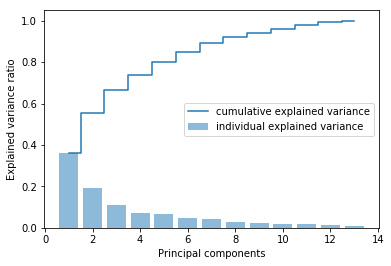

In [ ]:
plt.bar(range(1,14), var_exp, alpha=.5, label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.savefig("spectral_decomp.png")
#plt.show()

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [ ]:
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1]))

In [ ]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([-0.144329,  0.245188,  0.002051,  0.23932 , -0.141992, -0.394661, -0.422934,  0.298533, -0.313429,  0.088617,
        -0.296715, -0.376167, -0.286752]),
 array([ 0.483652,  0.224931,  0.316069, -0.010591,  0.299634,  0.06504 , -0.00336 ,  0.028779,  0.039302,  0.529996,
        -0.279235, -0.164496,  0.364903]))

In [ ]:
w = np.stack([eigen_pairs[0][1], eigen_pairs[1][1]], axis=1)

In [ ]:
xn[0].numpy().dot(w)

array([-3.307421,  1.439402])

In [ ]:
xpca = xn.numpy().dot(w)

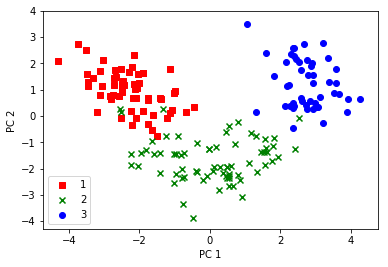

In [ ]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y.numpy()), colors, markers):
    plt.scatter(xpca[y.numpy()==l, 0],
                xpca[y.numpy()==l, 1],
                c=c, label=l, marker=m)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower left')
plt.savefig("./pca_transformed.png")
#plt.show()

In [ ]:
def _pca(x, k=2):
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])

In [ ]:
xsvd = _pca(xn).numpy()

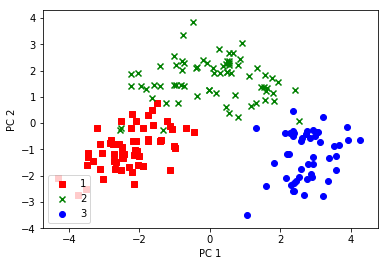

In [ ]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y.numpy()), colors, markers):
    plt.scatter(xsvd[y.numpy()==l, 0],
                xsvd[y.numpy()==l, 1],
                c=c, label=l, marker=m)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower left')
plt.savefig("./svd_transformed.png")
#plt.show()

## EON 